In [72]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [67]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [5]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [68]:
env.step(6)

(array([[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 False,
 None)

In [19]:
env.render()

|- - O|
|- O X|
|X X O|



In [8]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [9]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [10]:
env.render()

|- - X|
|- O -|
|- - -|



In [11]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [73]:
env.step((0,2))

ValueError: There is already a chess on position (0, 2).

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 False,
 None)

In [14]:
env.reward(player='X')

0

In [15]:
env.reward(player='O')

0

An example of finishing the game:

In [16]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [17]:
env.render()

|X X X|
|O O -|
|- - -|



In [18]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [19]:
env.reward(player='X')

1

In [20]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [21]:
env.reset();

In [14]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [23]:
opt_player.act(env.grid)

(2, 0)

In [24]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [2]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - X|
|- X O|
|X - -|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O -|
|- X O|
|- - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - O|
|- X O|
|X X X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|- O X|
|O - X|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|O X O|
|X O X|
|X O X|



### An example of optimal player playing against optimal player

In [1]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


NameError: name 'np' is not defined

### Q-Learning algorithm

In [207]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer
env = TictactoeEnv()

from collections import defaultdict
import random
class Q_Player:
    '''
    Description:
        A class to implement a Q-Learning optimal player in Tic-tac-toe.

    Parameters:
        epsilon: float, in [0, 1]. This is a value between 0-1 that indicates the
            probability of making a random action instead of the optimal action
            at any given time.
        alpha: float, in [0, 1]. This is the learning rate
        gamma: float, in [0, 1]. This is the discount factor

    '''
    def __init__(self, epsilon=0.2, player='X',
                 qvals = defaultdict(lambda: 0), neighbours = defaultdict(lambda: []), assignment = defaultdict(lambda: 0)):
        self.epsilon = epsilon
#         self.alpha = alpha
#         self.gamma = gamma
        self.player = player # 'x' or 'O'
        self.qvals = qvals # q values for each state
        self.neighbours = neighbours # list of neighouring states for each state
        self.assignment = assignment # id to label different grids

    def set_player(self, player = 'X', j=-1):
        self.player = player
        if j != -1:
            self.player = 'X' if j % 2 == 0 else 'O'

    def empty(self, grid):
        '''return all empty positions'''
        avail = []
        for i in range(9):
            pos = (int(i/3), i % 3)
            if grid[pos] == 0:
                avail.append(pos)
        return avail
    
    def eps_greedyMove(self, grid, assignment, val = None):
        """ Return the move with the optimal Q-value according to a epsilon-greedy policy. """
        self.assignment = assignment
        grid_id = assignment[str(grid)]
        if val is None:
            val = 1 if self.player == 'X' else -1
#         maxq = 0
#         finp = self.empty(grid)[0]
#         maxq_s = str(self.empty(grid)[0])
        print(grid, "aaaaaaaaaaaaaaa")
        for pos in self.empty(grid):
            grid_ = np.copy(grid)
            grid_[pos] = val            
            action = convert(pos)
            next_grid_id = assignment[str(grid_)]
            if next_grid_id not in self.neighbours:
                self.neighbours[grid_id].append(next_grid_id)
#             if self.qvals[grid_string + grid_s] >= self.qvals[grid_string + maxq_s]:
#                 finp = pos
#                 maxq_s = grid_s
            if self.qvals[grid_id][action] < 0:       # before the first update we set to 0 (insted of -99999) the Q-values  
                self.qvals[grid_id][action] = 0       # linked to feasible next actions
        if random.random() < self.epsilon:
            return self.randomMove(grid)#, maxq_s    #return actual move, best move, final best grid
        else:
            best_move = np.argmax(self.qvals[grid_id])
            return best_move, best_move  #return actual move, best move, final best grid
        
    def return_dicts(self):
        return self.assignment, self.neighbours

    def randomMove(self, grid):
        """ Chose a random move from the available options. """
        avail = self.empty(grid)
        return avail[random.randint(0, len(avail)-1)]

    def act(self, grid, assignment, **kwargs):
        """
        Goes through a hierarchy of moves, making the best move that
        is currently available each time (with probabitity 1-self.epsilon).
        A touple is returned that represents (row, col).
        """
        return self.eps_greedyMove(grid, assignment)

In [208]:
def convert(move):
    if type(move) != tuple:
        return move
    else:
        return (move[0]*3 + move[1] % 3)

In [209]:
##TOBEFIXED update not only after q-moves but also after the optimal player's moves
Turns = np.array(['X','O'])
n_games = 1000
winners = []
count = []
id_ = 0
qvals = defaultdict(lambda: np.zeros(9) - 999999)  # we initialize all actions with a negative q value that will be set to 0
neighbours = defaultdict(lambda: [])               # for feasible actions to avoid to choose unfeasible actions
assignments = defaultdict(lambda: len(assignment))
alpha = 0.05
gamma = 0.99
for i in range(n_games):
    print(i)
    env.reset()
    grid, _, __ = env.observe()
    player_opt_1 = OptimalPlayer(epsilon=0.5, player=Turns[i%2])
    player_q = Q_Player(epsilon=0.5, player=Turns[1 - i%2], qvals = qvals, neighbours = neighbours)
#     qvals = player_q.return_dict()[0]
#     neighbours = player_q.return_dict()[1]
    for j in range(9):
        prev_grid = assignment[str(grid)]
        if env.current_player == player_opt_1.player:
            move = player_opt_1.act(grid)
        else:
            move, max_move = player_q.act(grid, assignment)
            assignment, neighbours = player_q.return_dicts()
            
        move = convert(move)
        grid, end, winner = env.step(move, print_grid=False)
        print(grid, "ccc")    
        current_grid = assignments[str(grid)]
        if end:
            winners.append(winner)
            if winner == player_q.player:
                count.append(1)
                qvals[prev_grid][move] += alpha*(1 + gamma*(0 - qvals[prev_grid][move]))
            else:
                count.append(0)
                qvals[prev_grid] += alpha*(-1 + gamma*(0 - qvals[prev_grid][move]))
#             print('-------------------------------------------')
#             print('Game end, winner is player ' + str(winner))
#             print('Optimal player 1 = ' +  Turns[i%2])
#             print('Q player 2 = ' +  Turns[1-i%2])
            env.render()
            env.reset()
            break
        else:
            if env.current_player == player_q.player:
                qvals[prev_grid][move] += alpha*(gamma*np.max(qvals[current_grid]) - qvals[prev_grid][move]) # here R = 0


0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]] ccc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]] aaaaaaaaaaaaaaa


TypeError: 'numpy.int64' object is not iterable

In [165]:
assignments

defaultdict(<function __main__.<lambda>()>,
            {'[[0. 0. 0.]\n [0. 0. 0.]\n [1. 0. 0.]]': 85, 9: 86})

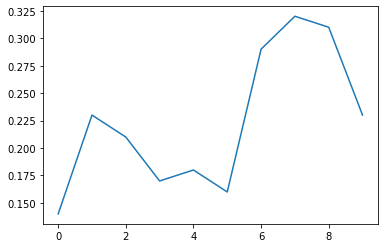

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.arange(80),[np.sum(i==1)/80 for i in np.split(np.array(count), 80)])

In [49]:
def assign_id(grid, assignments):
    if len(assignments) == 0:
        assignments[str(grid)] = 0
        return 0, assignments
    elif str(grid) in assignments:
        return assignments[str(grid)]
    else:
        n = len(assignments)
        assignments[str(grid)] = n
        return n